#  **Load Libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import seaborn as sns; 
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

#  **Load Data**

In [90]:
data_2009 = pd.read_json('data/data-sample_data-nyctaxi-trips-2009-json_corrigido.json', lines=True)
data_2009 = pd.DataFrame(data_2009)

In [91]:
data_2010 = pd.read_json('data/data-sample_data-nyctaxi-trips-2010-json_corrigido.json', lines=True)
data_2010 = pd.DataFrame(data_2010)

In [92]:
data_2011 = pd.read_json('data/data-sample_data-nyctaxi-trips-2011-json_corrigido.json', lines=True)
data_2011 = pd.DataFrame(data_2011)

In [93]:
data_2012 = pd.read_json('data/data-sample_data-nyctaxi-trips-2012-json_corrigido.json', lines=True)
data_2012 = pd.DataFrame(data_2012)

### **Group Datasets**

In [94]:
data = pd.concat([data_2009, data_2010, data_2011, data_2012], axis=0)

In [95]:
data.shape

(4000000, 17)

In [96]:
data.to_csv('data/full_taxi_trips_data.csv', index=False)

## Load Main Dataset

In [2]:
taxi_trips = pd.read_csv('data/full_taxi_trips_data.csv')

# **Initial Data Analysis**

## **Missing values**

In [3]:
taxi_trips.drop(['rate_code', 'store_and_fwd_flag'], axis=1, inplace=True)

## **Null Values**

In [4]:
taxi_trips.isnull().any()

vendor_id            False
pickup_datetime      False
dropoff_datetime     False
passenger_count      False
trip_distance        False
pickup_longitude     False
pickup_latitude      False
dropoff_longitude    False
dropoff_latitude     False
payment_type         False
fare_amount          False
surcharge            False
tip_amount           False
tolls_amount         False
total_amount         False
dtype: bool

In [5]:
taxi_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 15 columns):
vendor_id            object
pickup_datetime      object
dropoff_datetime     object
passenger_count      int64
trip_distance        float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
payment_type         object
fare_amount          float64
surcharge            float64
tip_amount           float64
tolls_amount         float64
total_amount         float64
dtypes: float64(10), int64(1), object(4)
memory usage: 457.8+ MB


# **Exploratory Data Analysis**

In [10]:
taxi_trips.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,tip_amount,tolls_amount,total_amount
0,CMT,2009-04-21T18:51:11.767205+00:00,2009-04-21T18:57:09.433767+00:00,2,0.80,-74.004114,40.742950,-73.994712,40.747950,Cash,5.4,0.0,0.0,0.0,5.4
1,CMT,2009-01-13T07:40:07.639754+00:00,2009-01-13T07:50:36.386011+00:00,1,5.40,-73.996506,40.747784,-73.940449,40.792385,Cash,15.4,0.0,0.0,0.0,15.4
2,VTS,2009-01-06T19:30:44.142187+00:00,2009-01-06T19:43:09.908429+00:00,5,1.67,-73.951340,40.752070,-73.944535,40.768108,CASH,6.1,1.0,0.0,0.0,7.1
3,VTS,2009-09-24T08:28:09.004451+00:00,2009-09-24T08:41:56.739991+00:00,1,4.13,-74.001117,40.729128,-73.958122,40.721812,CASH,12.9,0.5,0.0,0.0,13.4
4,VTS,2009-10-29T05:50:39.214629+00:00,2009-10-29T05:57:22.880174+00:00,1,2.03,-73.976600,40.756873,-73.979757,40.776075,CASH,7.7,0.5,0.0,0.0,8.2


In [7]:
# corr = data.corr(method='spearman')
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True
# fig, ax = plt.subplots()
# ax.figure.set_size_inches(15, 15)
# sns.heatmap(corr, ax=ax, annot=True,  mask=mask, fmt='.2f', cbar=False, square=True, cmap=plt.cm.Blues, center=0)

In [8]:
# corr.style.background_gradient().set_precision(2).set_properties(**{'font-size': '8pt'})

In [9]:
# sns.pairplot(data, plot_kws = {'alpha': 0.5})

## **Feature Extraction**

### **Fields to Uppercase**

In [10]:
taxi_trips['payment_type'] = taxi_trips['payment_type'].str.upper()
taxi_trips['vendor_id'] = taxi_trips['vendor_id'].str.upper() 

### **Extract Dates**

In [11]:
taxi_trips['pickup_datetime'] = pd.to_datetime(taxi_trips['pickup_datetime'])
taxi_trips['dropoff_datetime'] = pd.to_datetime(taxi_trips['dropoff_datetime'])
taxi_trips['trip_duration'] = taxi_trips['dropoff_datetime'] - taxi_trips['pickup_datetime']
taxi_trips['day_name'] = taxi_trips['pickup_datetime'].dt.day_name().str.upper()

In [12]:
taxi_trips['hour'] = taxi_trips['pickup_datetime'].dt.hour

In [13]:
taxi_trips['day_month'] = taxi_trips['pickup_datetime'].dt.strftime('%d/%m')

In [14]:
taxi_trips['day'] = taxi_trips['pickup_datetime'].dt.day

In [15]:
taxi_trips['month'] = taxi_trips['pickup_datetime'].dt.month

In [16]:
taxi_trips['year'] = taxi_trips['pickup_datetime'].dt.year

In [17]:
taxi_trips.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,...,tip_amount,tolls_amount,total_amount,trip_duration,day_name,hour,day_month,day,month,year
0,CMT,2009-04-21 18:51:11.767205+00:00,2009-04-21 18:57:09.433767+00:00,2,0.80,-74.004114,40.742950,-73.994712,40.747950,CASH,...,0.0,0.0,5.4,00:05:57.666562,TUESDAY,18,21/04,21,4,2009
1,CMT,2009-01-13 07:40:07.639754+00:00,2009-01-13 07:50:36.386011+00:00,1,5.40,-73.996506,40.747784,-73.940449,40.792385,CASH,...,0.0,0.0,15.4,00:10:28.746257,TUESDAY,7,13/01,13,1,2009
2,VTS,2009-01-06 19:30:44.142187+00:00,2009-01-06 19:43:09.908429+00:00,5,1.67,-73.951340,40.752070,-73.944535,40.768108,CASH,...,0.0,0.0,7.1,00:12:25.766242,TUESDAY,19,06/01,6,1,2009
3,VTS,2009-09-24 08:28:09.004451+00:00,2009-09-24 08:41:56.739991+00:00,1,4.13,-74.001117,40.729128,-73.958122,40.721812,CASH,...,0.0,0.0,13.4,00:13:47.735540,THURSDAY,8,24/09,24,9,2009
4,VTS,2009-10-29 05:50:39.214629+00:00,2009-10-29 05:57:22.880174+00:00,1,2.03,-73.976600,40.756873,-73.979757,40.776075,CASH,...,0.0,0.0,8.2,00:06:43.665545,THURSDAY,5,29/10,29,10,2009


In [18]:
taxi_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 22 columns):
vendor_id            object
pickup_datetime      datetime64[ns, UTC]
dropoff_datetime     datetime64[ns, UTC]
passenger_count      int64
trip_distance        float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
payment_type         object
fare_amount          float64
surcharge            float64
tip_amount           float64
tolls_amount         float64
total_amount         float64
trip_duration        timedelta64[ns]
day_name             object
hour                 int64
day_month            object
day                  int64
month                int64
year                 int64
dtypes: datetime64[ns, UTC](2), float64(10), int64(5), object(4), timedelta64[ns](1)
memory usage: 671.4+ MB


# Data Hands On

## 1. What is the average distance traveled by trips with a maximum of 2 passengers;

In [31]:
df_trips_max2_pass = taxi_trips[taxi_trips['passenger_count'] <= 2]

In [32]:
df_trips_max2_pass.shape

(3319652, 22)

In [33]:
# df = df_trips_max2_pass.groupby('year').agg({'trip_distance': ['mean']})
df = df_trips_max2_pass.groupby('year').agg({'trip_distance': ['min','max', 'mean']})

df.columns = ['min_distance', 'max_distance', 'average_distance']
df = df.reset_index()

In [34]:
df.head()

,year,min_distance,max_distance,average_distance
0,2009,0.0,49.7,2.662527
1,2010,0.0,49.7,2.662527
2,2011,0.0,49.7,2.662527
3,2012,0.0,49.7,2.662527


Text(0.5, 0, 'Year')

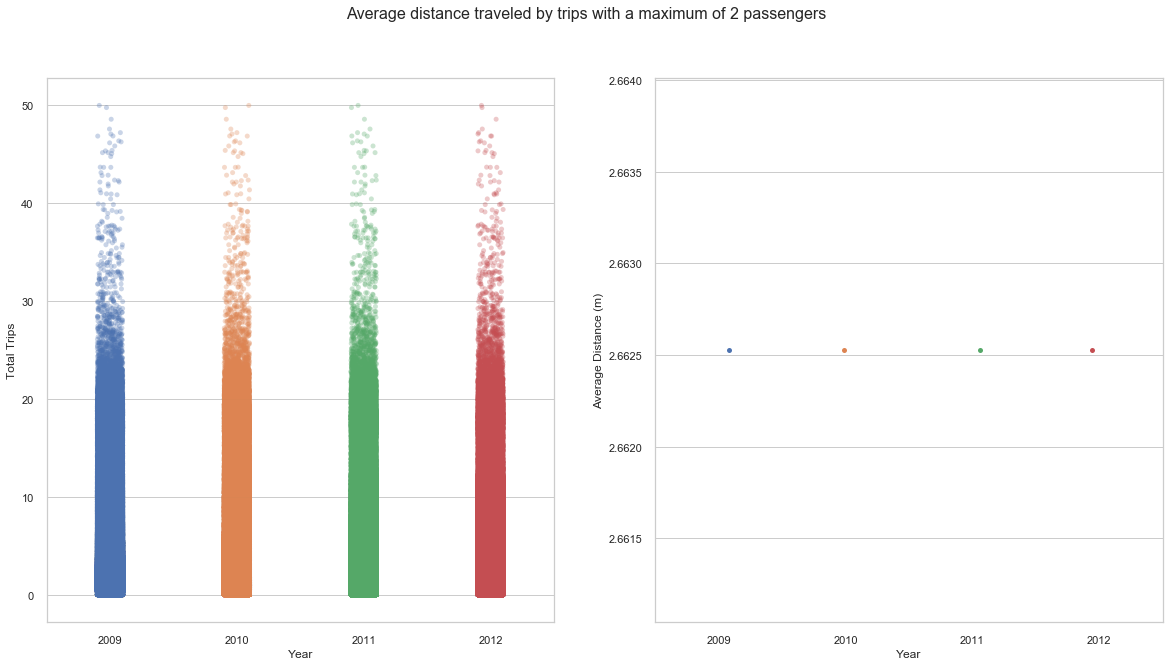

In [35]:
fig = plt.figure(figsize=(20,10))
fig.suptitle("Average distance traveled by trips with a maximum of 2 passengers", fontsize=16)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.stripplot(x="year", y="trip_distance", data=taxi_trips, jitter=True, dodge=False, alpha=.3, ax=ax1)
plt.plot(df_trips_max2_pass.groupby('year').mean()['trip_distance'], "s", mfc="black", ms=10)

sns.stripplot(x="year", y="average_distance", data=df, ax=ax2)

ax1.set_ylabel('Total Trips')
ax2.set_ylabel('Average Distance (m)')

ax1.set_xlabel('Year')
ax2.set_xlabel('Year')

## 2. Which are the 3 biggest vendors based on the total amount of money raised;

In [36]:
df_bigst_vendors = taxi_trips.groupby('vendor_id').agg({'total_amount': ['sum']})
df_bigst_vendors.columns = ['total_amount_raised']
df_bigst_vendors['total_amount_raised'] =  df_bigst_vendors['total_amount_raised'].round(2)
df_bigst_vendors = df_bigst_vendors.reset_index()

In [37]:
df_bigst_vendors = df_bigst_vendors.sort_values(by=['total_amount_raised'], ascending=False)
df_bigst_vendors.head()

,vendor_id,total_amount_raised
0,CMT,19549084.28
3,VTS,19043434.00
1,DDS,2714901.72
2,TS,45.60


Text(0, 0.5, 'Amount Raised ($)')

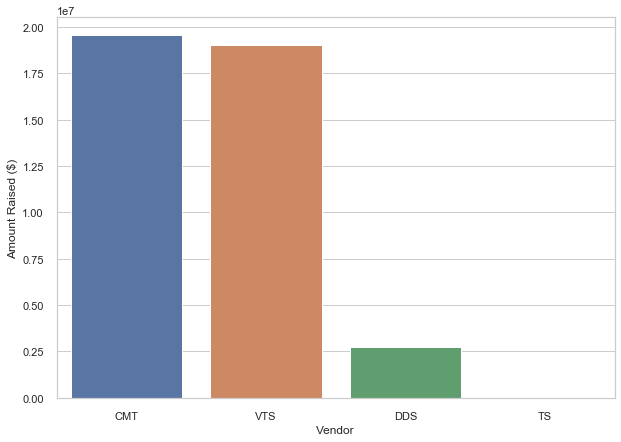

In [38]:
plt.figure(figsize=(10,7))
sns.set(style="whitegrid")
ax = sns.barplot(x="vendor_id", y="total_amount_raised", data=df_bigst_vendors)
plt.xlabel("Vendor")
plt.ylabel("Amount Raised ($)")

## 3. Make a histogram of the monthly distribution over 4 years of rides paid with cash;

In [39]:
df_cash_paid = taxi_trips[taxi_trips['payment_type'] == 'CASH']

In [40]:
df_cash_paid.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,...,tip_amount,tolls_amount,total_amount,trip_duration,day_name,hour,day_month,day,month,year
0,CMT,2009-04-21 18:51:11.767205+00:00,2009-04-21 18:57:09.433767+00:00,2,0.80,-74.004114,40.742950,-73.994712,40.747950,CASH,...,0.0,0.0,5.4,00:05:57.666562,TUESDAY,18,21/04,21,4,2009
1,CMT,2009-01-13 07:40:07.639754+00:00,2009-01-13 07:50:36.386011+00:00,1,5.40,-73.996506,40.747784,-73.940449,40.792385,CASH,...,0.0,0.0,15.4,00:10:28.746257,TUESDAY,7,13/01,13,1,2009
2,VTS,2009-01-06 19:30:44.142187+00:00,2009-01-06 19:43:09.908429+00:00,5,1.67,-73.951340,40.752070,-73.944535,40.768108,CASH,...,0.0,0.0,7.1,00:12:25.766242,TUESDAY,19,06/01,6,1,2009
3,VTS,2009-09-24 08:28:09.004451+00:00,2009-09-24 08:41:56.739991+00:00,1,4.13,-74.001117,40.729128,-73.958122,40.721812,CASH,...,0.0,0.0,13.4,00:13:47.735540,THURSDAY,8,24/09,24,9,2009
4,VTS,2009-10-29 05:50:39.214629+00:00,2009-10-29 05:57:22.880174+00:00,1,2.03,-73.976600,40.756873,-73.979757,40.776075,CASH,...,0.0,0.0,8.2,00:06:43.665545,THURSDAY,5,29/10,29,10,2009


In [41]:
df_cash_paid.shape

(3242852, 22)

In [42]:
df_cash_paid_hist = df_cash_paid.groupby(['year', 'month']).agg({'payment_type': ['count']})
df_cash_paid_hist.columns = ['payment_type_count']
df_cash_paid_hist = df_cash_paid_hist.reset_index()

In [43]:
df_cash_paid_hist.head()

,year,month,payment_type_count
0,2009,1,66824
1,2009,2,66680
2,2009,3,73948
3,2009,4,71142
4,2009,5,74151


<Figure size 2160x2016 with 0 Axes>

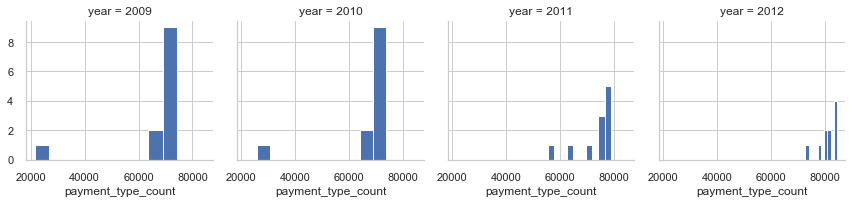

In [44]:
plt.figure(figsize=(30,28))
sns.FacetGrid(df_cash_paid_hist, col="year").map(plt.hist, "payment_type_count")

## 4. Make a time series chart computing the number of tips each day for the last 3 months of 2012.

In [46]:
df_tips = taxi_trips[(taxi_trips['month'] >= 10) & (taxi_trips['year'] == 2012)]

In [47]:
df_tips.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,...,tip_amount,tolls_amount,total_amount,trip_duration,day_name,hour,day_month,day,month,year
3000009,VTS,2012-10-17 11:28:59.571708+00:00,2012-10-17 11:43:49.819286+00:00,5,0.75,-74.001978,40.740683,-73.993722,40.747330,CASH,...,0.0,0.0,3.7,00:14:50.247578,WEDNESDAY,11,17/10,17,10,2012
3000011,VTS,2012-10-17 21:46:51.187166+00:00,2012-10-17 21:52:24.351695+00:00,1,4.02,-73.996177,40.686802,-73.990310,40.731687,CREDIT,...,2.0,0.0,14.2,00:05:33.164529,WEDNESDAY,21,17/10,17,10,2012
3000027,VTS,2012-10-19 11:28:47.324903+00:00,2012-10-19 11:38:44.793403+00:00,1,1.77,-73.953867,40.781828,-73.970007,40.759648,CREDIT,...,2.0,0.0,8.1,00:09:57.468500,FRIDAY,11,19/10,19,10,2012
3000029,VTS,2012-10-22 17:19:23.547796+00:00,2012-10-22 17:29:50.335519+00:00,1,1.75,-74.000610,40.717268,-73.996682,40.734113,CASH,...,0.0,0.0,8.5,00:10:26.787723,MONDAY,17,22/10,22,10,2012
3000030,VTS,2012-10-03 22:59:36.384652+00:00,2012-10-03 23:12:04.900045+00:00,2,0.47,-73.966812,40.764003,-73.961073,40.766725,CASH,...,0.0,0.0,4.7,00:12:28.515393,WEDNESDAY,22,03/10,3,10,2012


In [48]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89749 entries, 3000009 to 3999993
Data columns (total 22 columns):
vendor_id            89749 non-null object
pickup_datetime      89749 non-null datetime64[ns, UTC]
dropoff_datetime     89749 non-null datetime64[ns, UTC]
passenger_count      89749 non-null int64
trip_distance        89749 non-null float64
pickup_longitude     89749 non-null float64
pickup_latitude      89749 non-null float64
dropoff_longitude    89749 non-null float64
dropoff_latitude     89749 non-null float64
payment_type         89749 non-null object
fare_amount          89749 non-null float64
surcharge            89749 non-null float64
tip_amount           89749 non-null float64
tolls_amount         89749 non-null float64
total_amount         89749 non-null float64
trip_duration        89749 non-null timedelta64[ns]
day_name             89749 non-null object
hour                 89749 non-null int64
day_month            89749 non-null object
day                  89

In [49]:
df_tips.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,...,tip_amount,tolls_amount,total_amount,trip_duration,day_name,hour,day_month,day,month,year
3000009,VTS,2012-10-17 11:28:59.571708+00:00,2012-10-17 11:43:49.819286+00:00,5,0.75,-74.001978,40.740683,-73.993722,40.747330,CASH,...,0.0,0.0,3.7,00:14:50.247578,WEDNESDAY,11,17/10,17,10,2012
3000011,VTS,2012-10-17 21:46:51.187166+00:00,2012-10-17 21:52:24.351695+00:00,1,4.02,-73.996177,40.686802,-73.990310,40.731687,CREDIT,...,2.0,0.0,14.2,00:05:33.164529,WEDNESDAY,21,17/10,17,10,2012
3000027,VTS,2012-10-19 11:28:47.324903+00:00,2012-10-19 11:38:44.793403+00:00,1,1.77,-73.953867,40.781828,-73.970007,40.759648,CREDIT,...,2.0,0.0,8.1,00:09:57.468500,FRIDAY,11,19/10,19,10,2012
3000029,VTS,2012-10-22 17:19:23.547796+00:00,2012-10-22 17:29:50.335519+00:00,1,1.75,-74.000610,40.717268,-73.996682,40.734113,CASH,...,0.0,0.0,8.5,00:10:26.787723,MONDAY,17,22/10,22,10,2012
3000030,VTS,2012-10-03 22:59:36.384652+00:00,2012-10-03 23:12:04.900045+00:00,2,0.47,-73.966812,40.764003,-73.961073,40.766725,CASH,...,0.0,0.0,4.7,00:12:28.515393,WEDNESDAY,22,03/10,3,10,2012


In [50]:
df_tips_amount = df_tips.groupby(['day_month']).agg({'tip_amount': ['count']})
df_tips_amount.columns = ['tip_per_day']
df_tips_amount = df_tips_amount.reset_index()

In [51]:
df_tips_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
day_month      27 non-null object
tip_per_day    27 non-null int64
dtypes: int64(1), object(1)
memory usage: 560.0+ bytes


In [52]:
df_tips_amount.shape

(27, 2)

Text(0, 0.5, 'Tips Number')

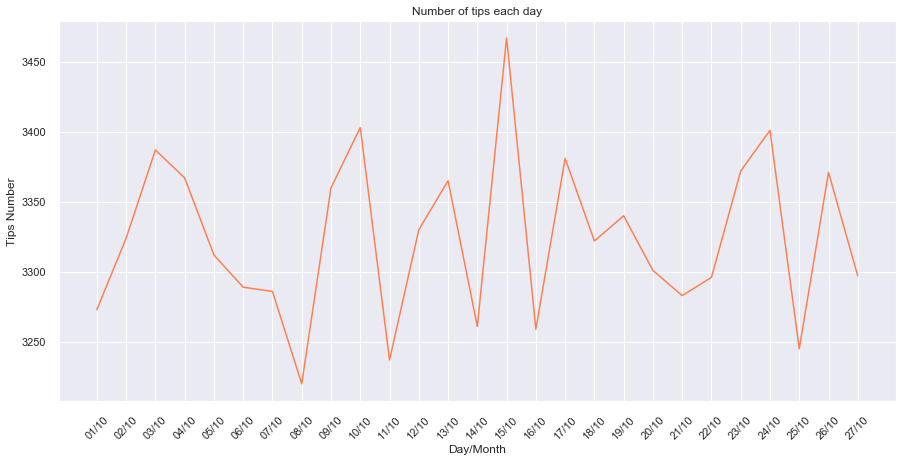

In [53]:
plt.figure(figsize=(15,7))
sns.set(style="darkgrid")

sns.lineplot(x="day_month", y="tip_per_day", color="coral", data=df_tips_amount)
plt.title("Number of tips each day")
plt.xlabel("Day/Month")
plt.xticks(rotation=45)
plt.ylabel("Tips Number")

# **Bonus items**

## What is the average trip time on Saturdays and Sundays;

In [54]:
df_weekend_rides = taxi_trips[taxi_trips['day_name'].isin(['SATURDAY', 'SUNDAY'])]
df_weekend_rides = df_weekend_rides.groupby('day_name')['trip_duration'].agg(lambda x: x.mean())
df_weekend_rides.columns = ['trip_duration']
df_weekend_rides = df_weekend_rides.reset_index()

In [55]:
df_weekend_rides.head()

,day_name,trip_duration
0,SATURDAY,00:08:44.939775
1,SUNDAY,00:08:44.641298


Text(0, 0.5, 'Trip Duration Average (h)')

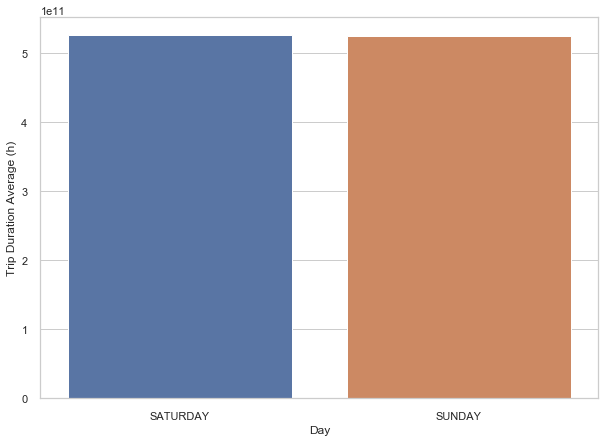

In [56]:
plt.figure(figsize=(10,7))
sns.set(style="whitegrid")
ax = sns.barplot(x="day_name", y="trip_duration", data=df_weekend_rides)
plt.xlabel("Day")
plt.ylabel("Trip Duration Average (h)")